In [62]:
import numpy as np
import matplotlib.pyplot as plt

def Rz(theta):
  
    return np.array([[  np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta),  np.cos(theta), 0 ],
                      [ 0            ,  0            , 1 ]])

# Apenas para visualização de um referencial no plano
def plot_frame(Porg, R, c=['r', 'g']):
    
    axis_size = 3.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
        
    # X
    plt.quiver(*Porg[:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)

# Transformações homogêneas

[[ 0.8660254 -0.5        0.        10.       ]
 [ 0.5        0.8660254  0.         5.       ]
 [ 0.         0.         1.         0.       ]]
[[ 0.8660254 -0.5        0.        10.       ]
 [ 0.5        0.8660254  0.         5.       ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         1.       ]]
[ 9.09807621 12.56217783  0.          1.        ]


(0.0, 14.0, 0.0, 14.0)

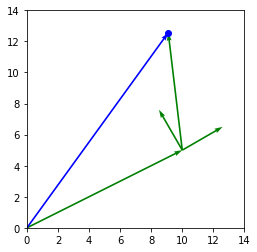

In [69]:
pb = np.array([3, 7, 0, 1])

pa_borg = np.array([10, 5, 0])

theta = np.deg2rad(30)
Rab = Rz(theta)

# Concatena o vetor origem ao final (coluna)
Tab = np.column_stack((Rab, pa_borg))
print(Tab)

# Concatena o vetor auxiliar embaixo (linha)
aux = np.array([0, 0, 0, 1])
Tab = np.row_stack((Tab, aux))
print(Tab)

pa = Tab @ pb
print(pa)


# Plotando os referenciais
plt.figure()
plot_frame(pa_borg, Rab, ['g', 'g'])

# Vetor Pa_borg
pa_org = np.array([0, 0])
plt.quiver(*pa_org[:2], *pa_borg[:2], color='g', angles='xy', scale_units='xy', scale=1)

# Vetor Pb
pb_aux = Rab @ pb[:3]
plt.quiver(*pa_borg[:2], *pb_aux[:2], color='g', angles='xy', scale_units='xy', scale=1)

# Vetor Pa
plt.quiver(*pa_org[:2], *pa[:2], color='b', angles='xy', scale_units='xy', scale=1)

plt.plot(pa[0], pa[1], 'o', color='b')

plt.axis('scaled')
plt.axis((0, 14, 0, 14))

## Transformações compostas

[11.24264069  7.75735931  0.          1.        ]


(0.0, 15.0, 0.0, 15.0)

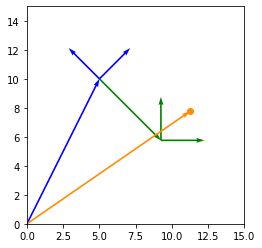

In [75]:
# Vetor auxiliar
aux = np.array([0, 0, 0, 1])

pc = np.array([2, 2, 0, 1])

aorg = np.array([0, 0])


# Definindo Tbc
pb_corg = np.array([0, -6, 0])
Rbc = Rz(np.deg2rad(-45))
Tbc = np.column_stack((Rbc, pb_corg))
Tbc = np.row_stack((Tbc, aux))

# Definindo Tab
pa_borg = np.array([5, 10, 0])
Rab = Rz(np.deg2rad(45))
Tab = np.column_stack((Rab, pa_borg))
Tab = np.row_stack((Tab, aux))


# Definindo Tac
Tac = Tab @ Tbc


# Plotando os referenciais
plt.figure()

# Frame C->B
pa_corg = np.array(Tac[:,3])
pb_corg_aux = Rab @ pb_corg
Rac = Tac[:3,:3]
plot_frame(pa_corg, Rac, ['g', 'g'])
plt.quiver(*pa_borg[:2], *pb_corg_aux[:2], color='g', angles='xy', scale_units='xy', scale=1)

# Frame B->A
plot_frame(pa_borg, Rab, ['b', 'b'])
plt.quiver(*aorg, *pa_borg[:2], color='b', angles='xy', scale_units='xy', scale=1)


# Calculando pa
pa = Tac @ pc
print(pa)

plt.plot(pa[0], pa[1], 'o', color='darkorange')
plt.quiver(*aorg, *pa[:2], color='darkorange', angles='xy', scale_units='xy', scale=1)

plt.axis('scaled')
plt.axis((0, 15, 0, 15))

## Inversão de transformações

In [65]:
pa_borg = np.array([4, 3, 0])

theta = np.deg2rad(30)
Rab = Rz(theta)

aux = np.array([0, 0, 0, 1])
Tab = np.column_stack((Rab, pa_borg))
Tab = np.row_stack((Tab, aux))
print(Tab)

# Transformação inversa
Rba = Rab.T
pb_aorg = -Rba @ pa_borg

Tba = np.column_stack((Rba, pb_aorg.T))
Tba = np.row_stack((Tba, aux))
print(Tba)

# Calculando a inversa
print(np.linalg.inv(Tab))

[[ 0.8660254 -0.5        0.         4.       ]
 [ 0.5        0.8660254  0.         3.       ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         1.       ]]
[[ 0.8660254   0.5         0.         -4.96410162]
 [-0.5         0.8660254   0.         -0.59807621]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
[[ 0.8660254   0.5         0.         -4.96410162]
 [-0.5         0.8660254   0.         -0.59807621]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


# Espaço de configurações

In [85]:
# conda install scikit-geometry -c conda-forge
# https://scikit-geometry.github.io/scikit-geometry/
import skgeom as sg
import skgeom.draw as sgdraw

# pip install shapely
# conda install --channel conda-forge shapely
# pip install descartes

# https://pypi.org/project/Shapely/
# https://shapely.readthedocs.io/en/latest/manual.html
from shapely.geometry import Polygon
from shapely.geometry import Point

from descartes.patch import PolygonPatch

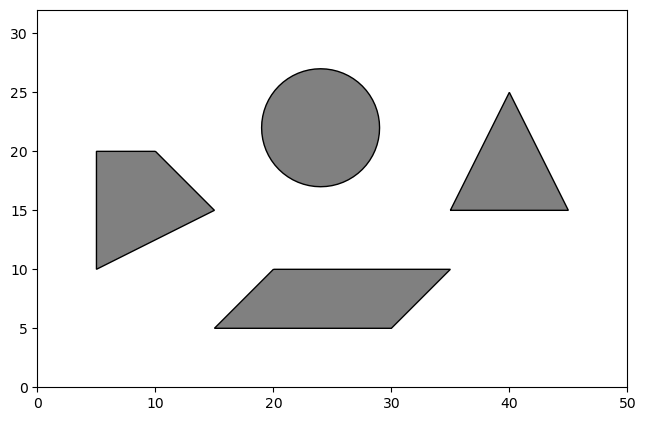

In [67]:
WORLDX, WORLDY = 50, 32 

# Criando obstáculos
obs1 = Polygon([(10, 20), (5, 20), (5, 10), (15, 15)])
obs2 = Polygon([(35, 15), (40, 25), (45, 15)])
obs3 = Polygon([(20, 10), (15, 5), (30, 5), (35, 10)])
obs4 = Point([24, 22]).buffer(5)

obs_set = [obs1, obs2, obs3, obs4]

# Método para plotar o mapa
def plot_map(obs_set):

    fig = plt.figure(figsize=(8,5), dpi=100)
    ax = fig.add_subplot(111, aspect='equal') 

    for obs in obs_set:
        ax.add_patch(PolygonPatch(obs, facecolor='gray'))
        
    ax.set_xlim(0, WORLDX)
    ax.set_ylim(0, WORLDY)

    
plot_map(obs_set)

## Robô circular

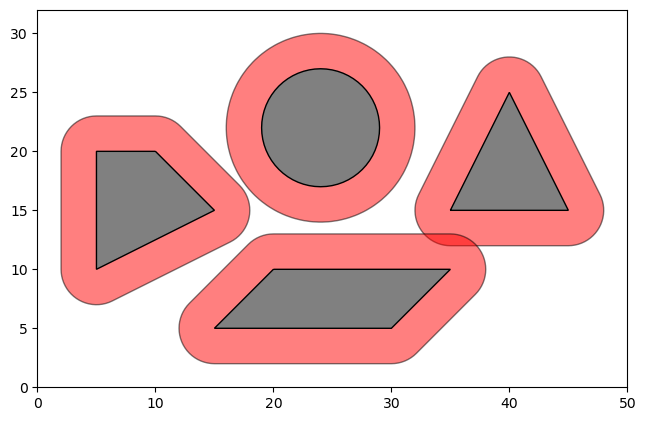

In [79]:
R = 3

obs_set = [obs1, obs2, obs3, obs4]

obs_set_dilated = []
for obs in obs_set:
    obs_set_dilated.append(obs.buffer(R))

plot_map(obs_set)    
    
for obs in obs_set_dilated:
    plt.gca().add_patch(PolygonPatch(obs, facecolor='red', alpha=.5, zorder=0))    

## Robô poligonal

(0.0, 32.0)

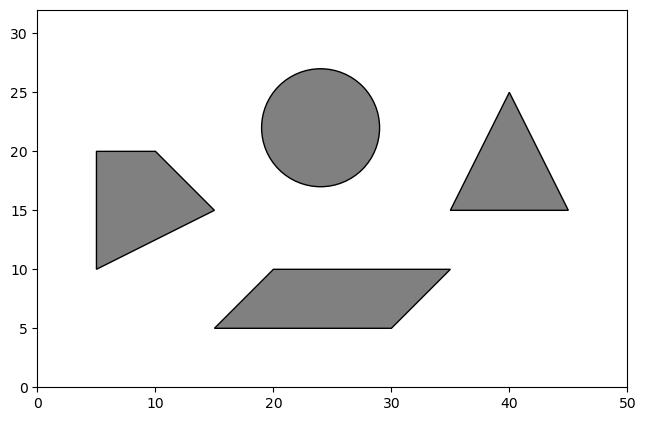

In [86]:
from skgeom import minkowski

obs1 = sg.Polygon([sg.Point2(10, 20), sg.Point2(5, 20), sg.Point2(5, 10), sg.Point2(15, 15)])
obs2 = sg.Polygon([sg.Point2(45, 15), sg.Point2(40, 25), sg.Point2(35, 15)])
obs3 = sg.Polygon([sg.Point2(15, 5), sg.Point2(30, 5), sg.Point2(35, 10), sg.Point2(20, 10),])
obs4 = sg.Circle2(sg.Point2(24, 22), 5**2, sg.Sign.CLOCKWISE)

obs_set = [obs1, obs2, obs3, obs4]

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

for obs in obs_set:
    if isinstance(obs, sg._skgeom.Circle2):
        sgdraw.draw(obs, fill=True, color='gray', ec='k', linewidth=1)
    elif isinstance(obs, sg._skgeom.Polygon):
        sgdraw.draw(obs, facecolor='gray', line_width=1)

ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)

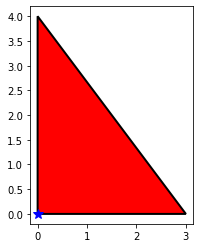

In [91]:
robot = sg.Polygon([sg.Point2(0, 0), sg.Point2(3, 0), sg.Point2(0, 4)])
#robot = sg.Polygon([sg.Point2(-1, -1), sg.Point2(2, -1), sg.Point2(-1, 3)])
#robot = sg.Polygon([sg.Point2(-1, -1), sg.Point2(1, -1), sg.Point2(1, 1), sg.Point2(0, 3), sg.Point2(-1, 1)])

plt.figure()
sgdraw.draw(robot, facecolor='red')
plt.gca().plot(0, 0, 'b*', markersize=10)

(0.0, 32.0)

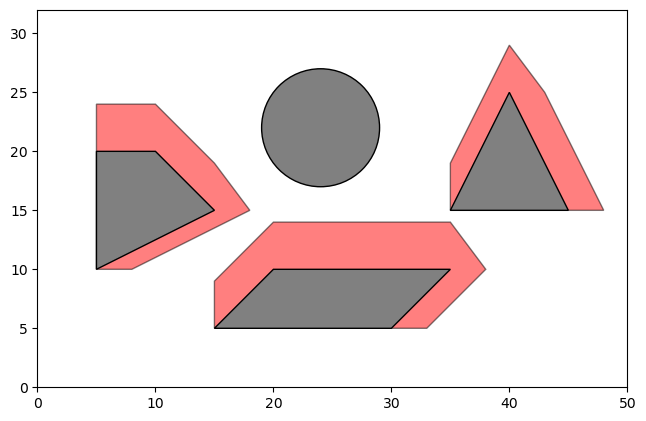

In [92]:
fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

# Calculando o Minkowski
obs_set_dilated = []
for obs in obs_set:
    if isinstance(obs, sg._skgeom.Polygon):
        result = minkowski.minkowski_sum(robot, obs)
        obs_set_dilated.append(result)    
        sgdraw.draw(result, facecolor='red', line_width=1, alpha=.5)

# Plotando o Mapa
for obs in obs_set:
    if isinstance(obs, sg._skgeom.Circle2):
        sgdraw.draw(obs, fill=True, color='gray', ec='k', linewidth=1)
    elif isinstance(obs, sg._skgeom.Polygon):
        sgdraw.draw(obs, facecolor='gray', line_width=1)

ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)    

# Para praticar

- Faça o cálculo de $P \oplus -Q \Rightarrow P \ominus Q$
- Aproxime o círculo de um polígono regular e faça o cálculo
- Faça testes com polígonos não-convexos
- Faça o cálculo considerando também rotações (C-space tridimensional)